In [1]:
import sys
import os

# Add the project directory of "tests" to sys.path
sys.path.append(os.path.abspath("/Users/workspace/Software/Layered_Tank_Simulation/CherenkovSim/"))

In [2]:
import ROOT
import numpy as np 
import matplotlib as mpl
from matplotlib import pyplot as plt
import astropy.units as u
import h5py
from scipy.constants import c 
from cherenkov_sim.material import Material
from cherenkov_sim.constants import TOP_TANK,H_TANK

In [3]:
water = Material(
    name = 'water',
    Z_A = 0.55509 * u.mol / u.g,
    rho = 1 * u.g / u.cm**3,
    I = 79.7 * u.eV,
    n = 1.333,
    X0 = 36.08 * u.cm, 
    delta_file = '/Users/workspace/Software/PHYS-F-420/lesson2/delta_elec.txt',
    att_file = '/Users/workspace/Software/Layered_Tank_Simulation/CherenkovSim/cherenkov_sim/water_gamma_cross_section.txt'
)

In [4]:
def get_charge_values(photon_coor_x, photon_coor_y, photon_coor_z, particle_number, unique_particle_number, particle_peak_list, particle_charge_list, max_iters = 100, isverbose=False):
        
        counter = 1

        pmt_coor = [0,0,120] # cm 
        tau = 25 * 1e-9 #ns 

        for evt_num in unique_particle_number:

                if(isverbose):
                        print('Processing particle ',evt_num)

                counter += 1
        
                mask_number = evt_num
                number_mask = (particle_number == evt_num)  

                if(isverbose):
                    print(len(number_mask))

                # Compute distance between photons produced from 0 to 80 cm on z axis to the PMT 
                top_tank_mask_1 = photon_coor_z[number_mask] > 80
                top_tank_mask_2 = photon_coor_z[number_mask] < 120
                top_tank_mask = np.logical_and(top_tank_mask_1, top_tank_mask_2)
                photon_x_event = photon_coor_x[number_mask][top_tank_mask]
                photon_y_event = photon_coor_y[number_mask][top_tank_mask]
                photon_z_event = photon_coor_z[number_mask][top_tank_mask]
        
                dist_photons_pmt = np.sqrt( photon_x_event**2 + photon_y_event**2 + (photon_z_event - pmt_coor[2])**2 )
                time_direct_photons_pmt = dist_photons_pmt / (water.n * c.to(u.cm/u.s).value)
        
                exp_time = np.random.exponential(tau, size=len(time_direct_photons_pmt))
                time_photons_pmt = 2*time_direct_photons_pmt + exp_time
        
                counts, bin_edges = np.histogram(time_photons_pmt*1e9,bins=np.arange(0,450,25))
        
                max_counts = np.max(counts)
                tot_counts = np.sum(counts)
        
                particle_peak_list.append(max_counts)
                particle_charge_list.append(len(dist_photons_pmt))
                
                if(isverbose):
                        print('Processing particle ',evt_num)
                        print(len(number_mask))

        
                if(counter > max_iters):break

In [5]:
# Open h5 file 
N_EVENTS = '10000'
hfile = h5py.File('/Users/workspace/Software/Layered_Tank_Simulation/CherenkovSim/tests/output/Cherenkov_photons'+N_EVENTS+'.h5','r')
print(hfile.keys())

<KeysViewHDF5 ['e_number', 'gamma_number', 'mu_number', 'photons_e_x', 'photons_e_y', 'photons_e_z', 'photons_gamma_x', 'photons_gamma_y', 'photons_gamma_z', 'photons_mu_x', 'photons_mu_y', 'photons_mu_z']>


In [6]:
mu_number = hfile['mu_number']
photons_mu_x = hfile['photons_mu_x']
photons_mu_y = hfile['photons_mu_y']
photons_mu_z = hfile['photons_mu_z']

In [7]:
e_number = hfile['e_number']
photons_e_x = hfile['photons_e_x']
photons_e_y = hfile['photons_e_y']
photons_e_z = hfile['photons_e_z']

In [8]:
gamma_number = hfile['gamma_number']
photons_gamma_x = hfile['photons_gamma_x']
photons_gamma_y = hfile['photons_gamma_y']
photons_gamma_z = hfile['photons_gamma_z']

In [9]:
mu_evt_number = np.unique( np.asarray(mu_number) )
e_evt_number = np.unique( np.asarray(e_number) )
gamma_evt_number = np.unique( np.asarray(gamma_number) )

print("Number of muons: ",len(mu_evt_number))
print("Number of electrons: ",len(e_evt_number))
print("Number of gamma: ",len(gamma_evt_number))

print("Total sum ", len(mu_evt_number)+len(e_evt_number)+len(gamma_evt_number))


Number of muons:  1447
Number of electrons:  583
Number of gamma:  3593
Total sum  5623


In [10]:
mu_evt_number

array([   9,   16,   21, ..., 9967, 9970, 9994])

In [11]:
# Plot a signal vs time histogram 
mask_number = 213
mu_number_mask = (mu_number == mu_number[mask_number])


In [12]:
# Define coordinates of PMT 
pmt_coor = [0,0,120] # cm 
tau = 25 * 1e-9 #ns 

# Compute distance between photons produced from 0 to 80 cm on z axis to the PMT 
top_tank_mask_1 = photons_mu_z[mu_number_mask] > 80
top_tank_mask_2 = photons_mu_z[mu_number_mask] < 120
top_tank_mask = np.logical_and(top_tank_mask_1, top_tank_mask_2)
photon_x_event_mu = photons_mu_x[mu_number_mask][top_tank_mask]
photon_y_event_mu = photons_mu_y[mu_number_mask][top_tank_mask]
photon_z_event_mu = photons_mu_z[mu_number_mask][top_tank_mask]
c = c * u.m / u.s
dist_photons_pmt = np.sqrt( photon_x_event_mu**2 + photon_y_event_mu**2 + (photon_z_event_mu - pmt_coor[2])**2 )
time_direct_photons_pmt = dist_photons_pmt / (water.n * c.to(u.cm/u.s).value)

exp_time = np.random.exponential(tau, size=len(time_direct_photons_pmt))
time_photons_pmt = time_direct_photons_pmt + exp_time

In [13]:
print(time_direct_photons_pmt[0:10])

[3.86274833e-09 3.86118829e-09 3.85809696e-09 3.86388390e-09
 3.86387388e-09 3.86393485e-09 3.86277040e-09 3.86282549e-09
 3.85735406e-09 3.86394185e-09]


Peak value:  545.0
Integral value:  975.0
Total number of photons 975


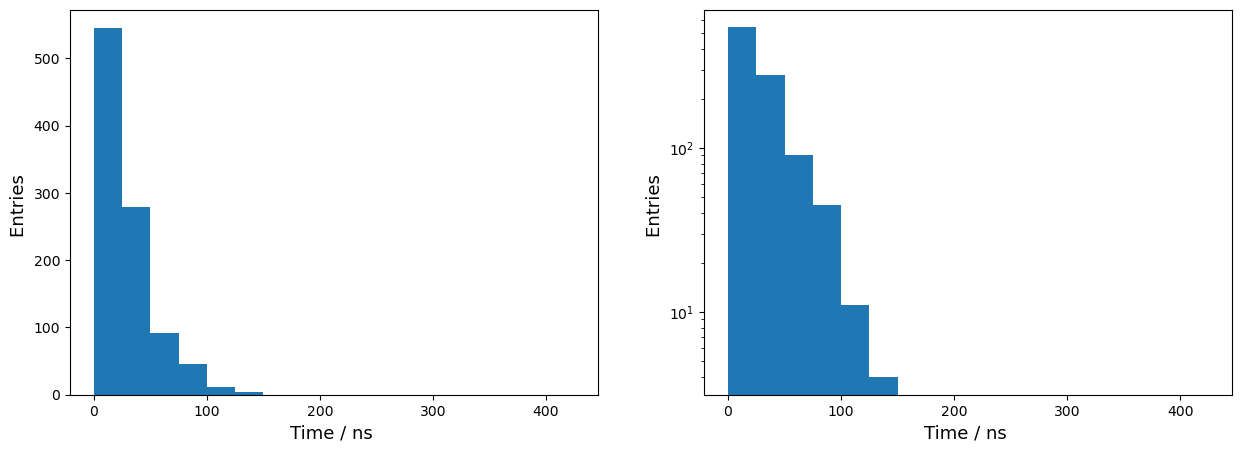

In [14]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
counts, bin_edges, fig = plt.hist(time_photons_pmt*1e9,bins=np.arange(0,450,25))
plt.xlabel('Time / ns ',size = 13)
plt.ylabel('Entries ',size = 13)
plt.yscale('linear')


plt.subplot(1,2,2)
counts, bin_edges, fig = plt.hist(time_photons_pmt*1e9,bins=np.arange(0,450,25))
plt.xlabel('Time / ns ',size = 13)
plt.ylabel('Entries ',size = 13)
plt.yscale('log')

max_counts = np.max(counts)
tot_counts = np.sum(counts)

print("Peak value: ", max_counts)
print("Integral value: ",tot_counts)
print("Total number of photons",len(time_photons_pmt))

plt.savefig('./plots/photons_time_TOP_'+str(H_TANK.value - TOP_TANK.value)+'_'+N_EVENTS+'.pdf',format='pdf')


In [15]:
# Define lists to store values 

mu_charge_peak = []
mu_integrated_charge = []

e_charge_peak = []
e_integrated_charge = []


In [16]:
mask_number = gamma_evt_number[4]
number_mask = (gamma_number == mask_number)  

In [17]:
gamma_charge_peak = []
gamma_integrated_charge = []

get_charge_values(photons_gamma_x, photons_gamma_y, photons_gamma_z, gamma_number, gamma_evt_number, gamma_charge_peak, gamma_integrated_charge, len(gamma_evt_number), isverbose=False)

In [18]:
get_charge_values(photons_mu_x, photons_mu_y, photons_mu_z, mu_number, mu_evt_number, mu_charge_peak, mu_integrated_charge, len(mu_evt_number))
get_charge_values(photons_e_x, photons_e_y, photons_e_z, e_number, e_evt_number, e_charge_peak, e_integrated_charge, len(e_evt_number))


In [19]:
len(gamma_integrated_charge)

3593

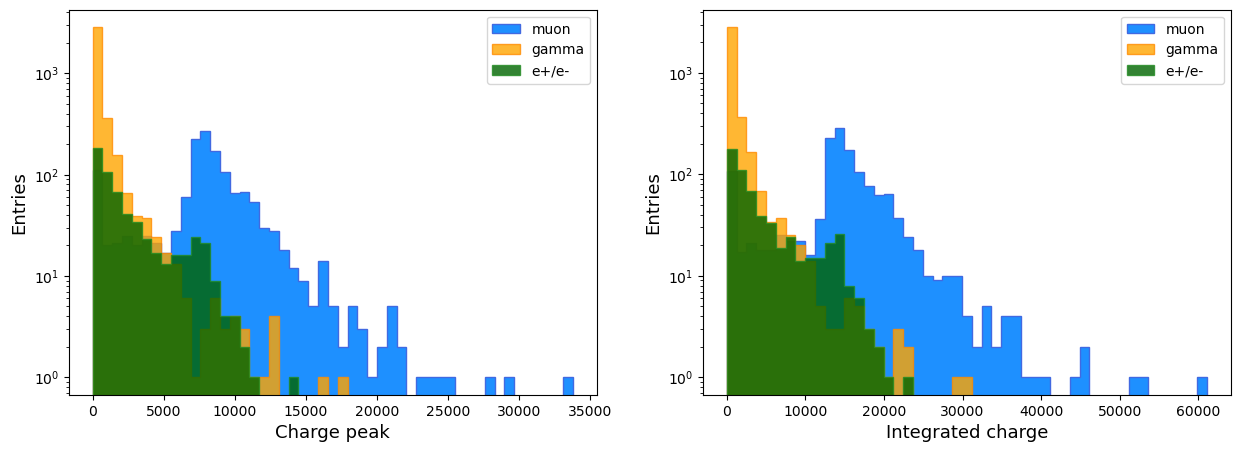

In [20]:
from cherenkov_sim.constants import TOP_TANK

plt.subplots(1,2,figsize=(15,5))

peak_bins = np.linspace(0,np.max(mu_charge_peak),50)

plt.subplot(1,2,1)
plt.hist(mu_charge_peak, bins=peak_bins, color='dodgerblue',edgecolor='royalblue',histtype= "stepfilled", label = 'muon')
plt.hist(gamma_charge_peak, bins=peak_bins, color='orange',edgecolor='darkorange',histtype= "stepfilled", alpha=0.8, label = 'gamma')
plt.hist(e_charge_peak, bins=peak_bins, color='darkgreen',edgecolor='forestgreen',histtype= "stepfilled", alpha=0.8, label = 'e+/e-')

plt.xlabel("Charge peak",size = 13)
plt.ylabel("Entries", size=13)
plt.yscale('log')
plt.legend()


plt.subplot(1,2,2)

charge_bins = np.linspace(0,np.max(mu_integrated_charge),50)

plt.hist(mu_integrated_charge, bins=charge_bins, color='dodgerblue',edgecolor='royalblue',histtype= "stepfilled", label = 'muon')
plt.hist(gamma_integrated_charge, bins=charge_bins, color='orange',edgecolor='darkorange',histtype= "stepfilled", alpha=0.8, label = 'gamma')
plt.hist(e_integrated_charge, bins=charge_bins, color='darkgreen',edgecolor='forestgreen',histtype= "stepfilled", alpha=0.8, label = 'e+/e-')

plt.xlabel("Integrated charge",size = 13)
plt.ylabel("Entries", size=13)
plt.yscale('log')
plt.legend()

plt.savefig('./plots/charge_peak'+'_TOP_'+str(H_TANK.value - TOP_TANK.value)+'_'+N_EVENTS+'.pdf',format='pdf')

